## 数据可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

最基本的可视化图案有折线图、条形图、直方图、饼状图、箱状图、散点图、区域块状图

#### 折线图 可以观察数据随着某个变量的变化趋势

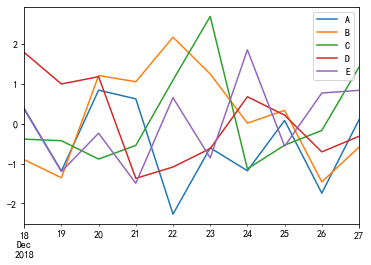

In [10]:
df = pd.DataFrame(np.random.randn(10,5),index=pd.date_range('2018/12/18',
   periods=10), columns=list('ABCDE'))
df.plot()
plt.show()

plot()中kind的主要参数有：bar或barh为条形，hist为直方图，boxplot为盒型图，area为面积，scatter为散点图

#### 条形图 可以对比多个值的差别

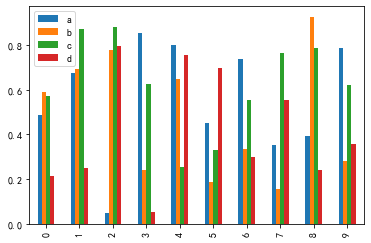

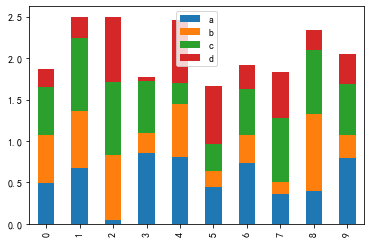

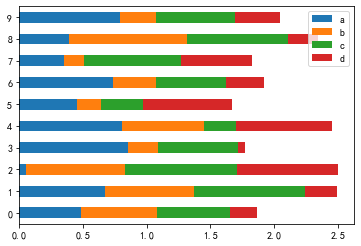

In [13]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
# 使用bar()生成直方图，barh()生成水平条形图（要生成一个堆积条形图，通过指定：stacked=True）
df.plot.bar()
df.plot.bar(stacked=True)
df.plot.barh(stacked=True)
plt.show()

#### 直方图 展示数据频数/率的特殊的柱状图   

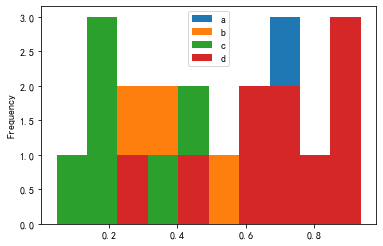

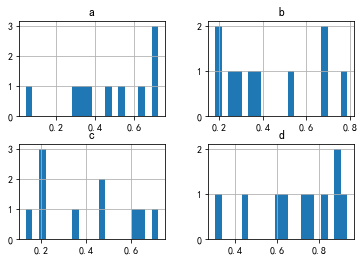

In [23]:
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot(kind='hist')
#plt.show()
# 要为每列绘制不同的直方图，使用以下代码
df.hist(bins=20)# 图2（3个小图）
plt.show()

#### 箱状图 展示出分位数，具体包括上四分位数、下四分位数、中位数以及上下5%的极值

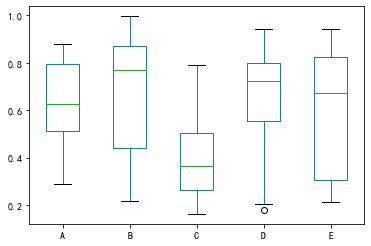

In [25]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
plt.show()

#### 区域块状图 要生成堆积的区域图图，每列必须全部为正值或全为负值, 想要生成不堆积的区域图，设置参数 stacked=False

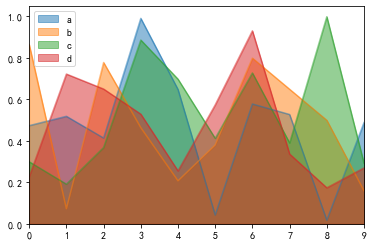

In [27]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=False)
plt.show()

#### 散点图可以探索变量之间的关系，如果想要在单个轴上绘制多个列组，需要指定 ax。

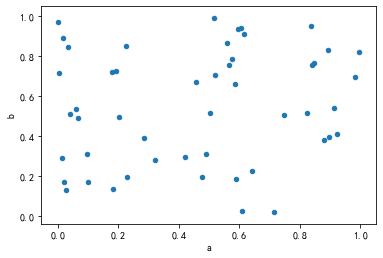

In [28]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')
plt.show()

#### 饼状图可以分析数据占比，份额的关系

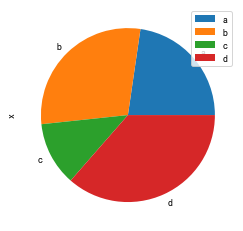

In [31]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)
plt.show()

In [64]:
df_result=pd.read_csv('D:/数据分析项目/result.csv')
df_result.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C


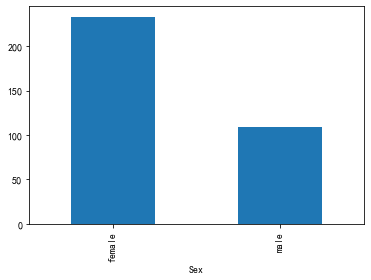

In [65]:
df_result_s=df_result.groupby('Sex')['Survived'].sum()
df_result_s.plot.bar()
plt.show()

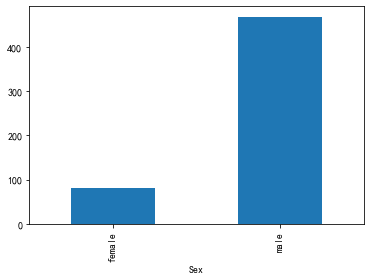

In [79]:
df_result_d=df_result.groupby('Sex')['Survived'].count()-df_result.groupby('Sex')['Survived'].sum()
df_result_d.rename('Deaded',inplace=True)
df_result_d.plot.bar()
plt.show()

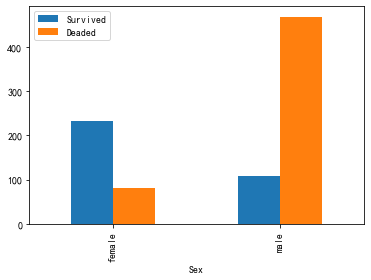

In [81]:
#男性死亡比例高于女性
df_result_a=pd.concat([df_result_s,df_result_d],axis=1)
df_result_a.plot.bar()
plt.show()

Text(0, 0.5, 'count')

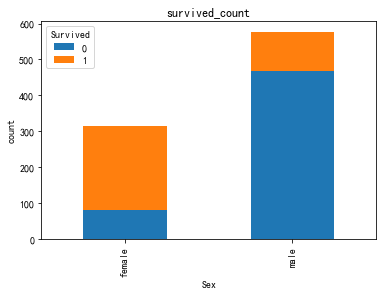

In [84]:
df12=df_result.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

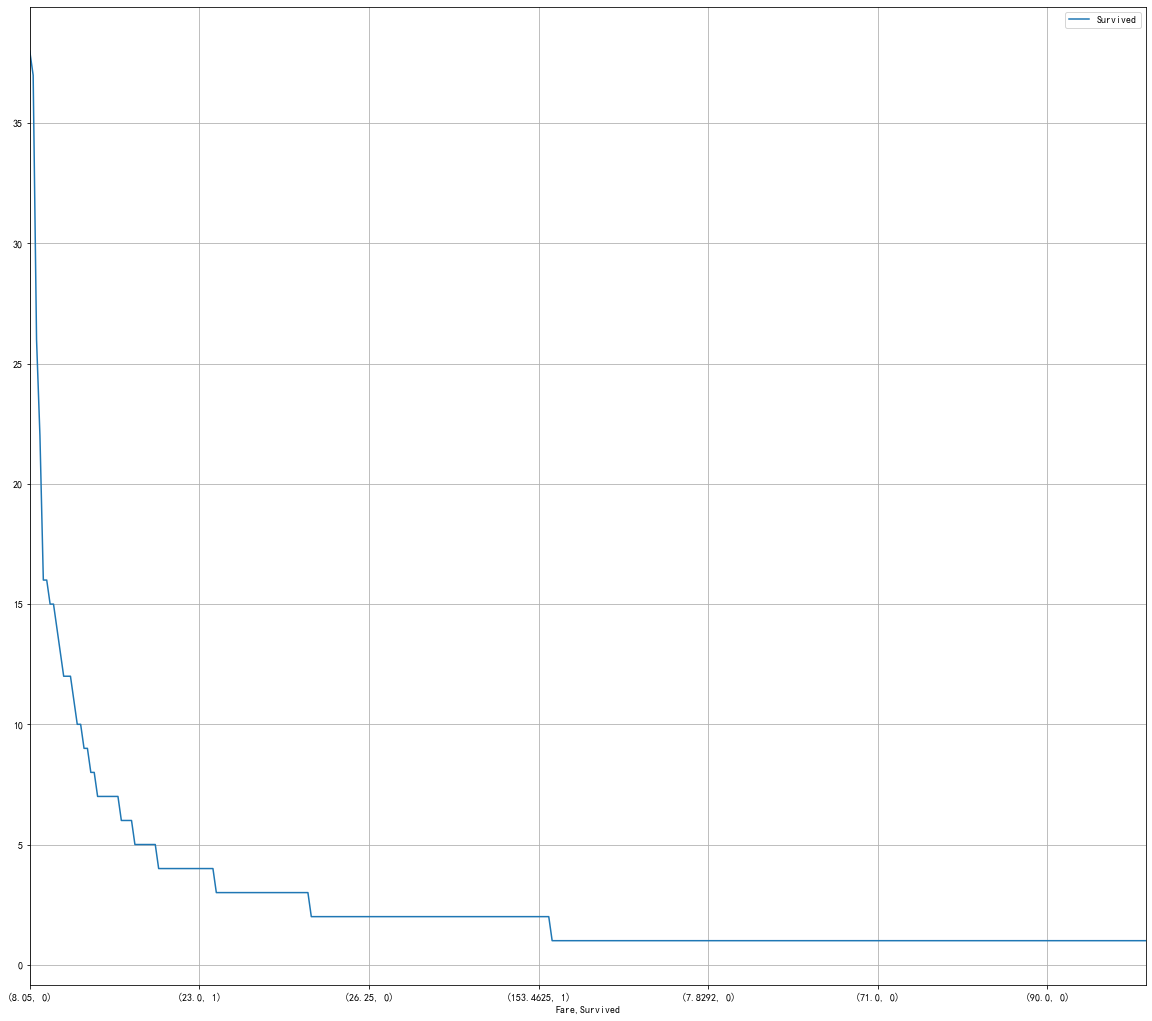

In [91]:
df_fare=df_result.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(20, 18))
df_fare.plot(grid=True)
plt.legend()
plt.show()

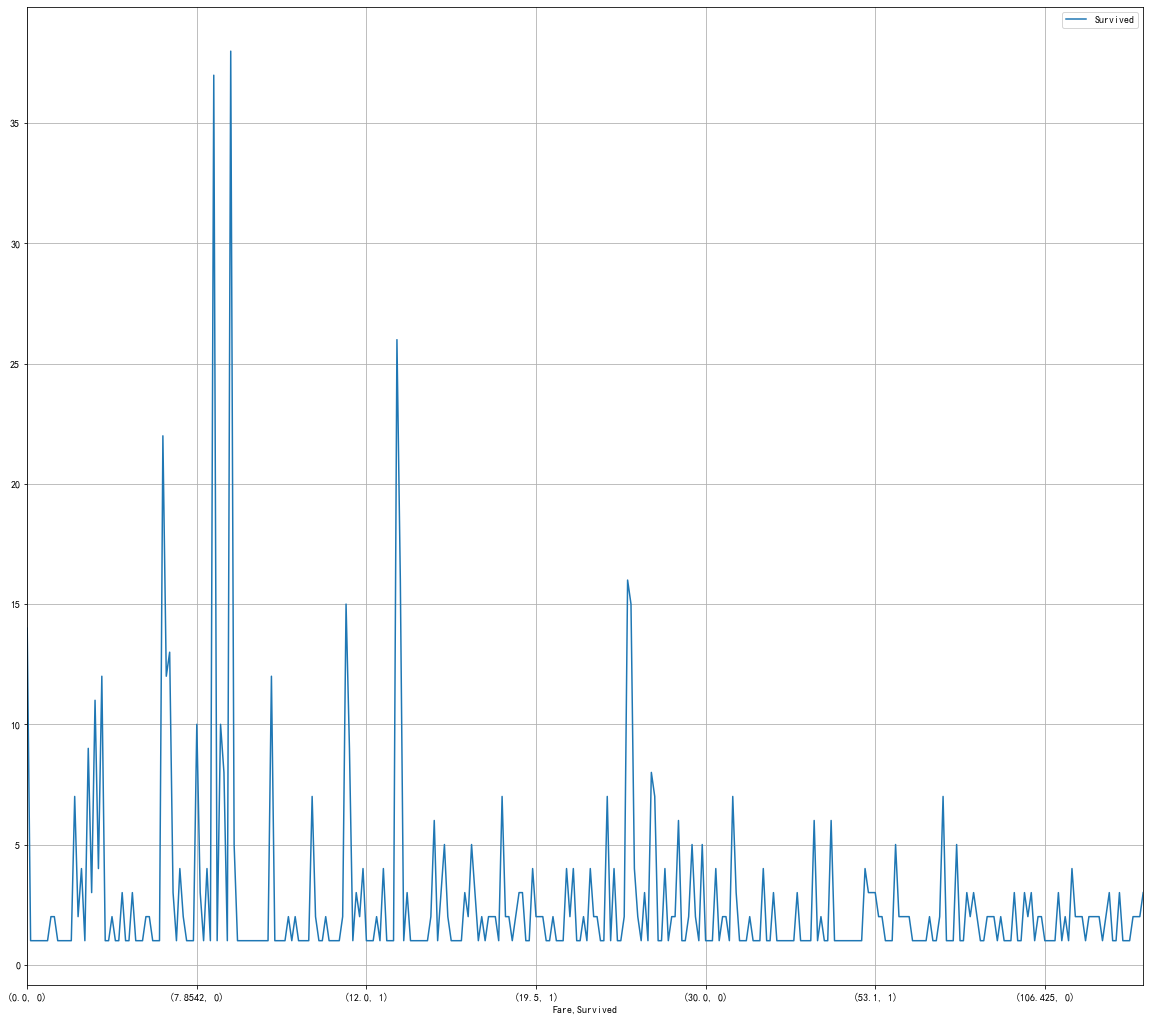

In [92]:
df_fare=df_result.groupby(['Fare'])['Survived'].value_counts()
fig = plt.figure(figsize=(20, 18))
df_fare.plot(grid=True)
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

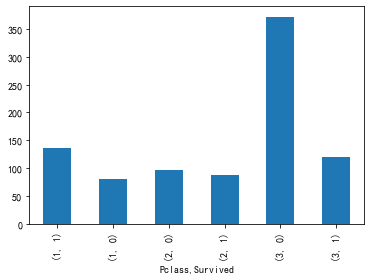

In [94]:
df_pcl=df_result.groupby(['Pclass'])['Survived'].value_counts()
df_pcl.plot.bar()
plt.show()

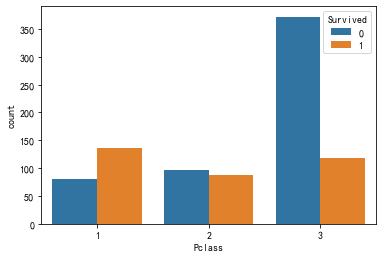

In [97]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=df_result)

可视化可以形象地展示数据，但对于不同类型的数据需要选取不同的可视化图案来展示才能更好的表现出数据的特征

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

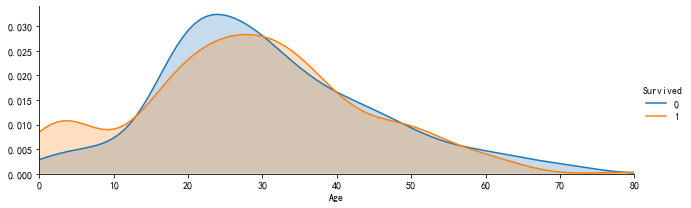

In [102]:
df_age = sns.FacetGrid(df_result, hue="Survived",aspect=3) #hue 类别 aspect 横纵比
df_age.map(sns.kdeplot,'Age',shade= True) #核密度估计图
df_age.set(xlim=(0, df_result['Age'].max())) #设置x区间
df_age.add_legend()

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

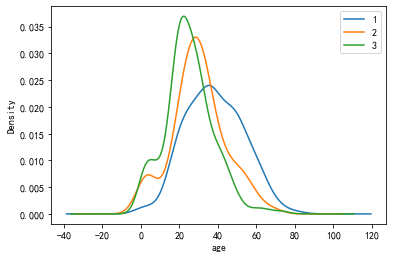

In [107]:
df_result.Age[df_result.Pclass == 1].plot(kind='kde')
df_result.Age[df_result.Pclass == 2].plot(kind='kde')
df_result.Age[df_result.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")

船上整体女性存活率高于男性，在船上20-40岁的人占多数，而这些人中等级1的人存活率相对比较高